# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [1]:
import pandas as pd

#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então #encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv',sep=';',encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv',sep=';',encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv',sep=';',encoding='ISO-8859-1')


#usaremos o display para ver todos os dataframes
display(vendas_df)
# display(produtos_df)
# display(lojas_df)
# display(clientes_df)



,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [2]:
clientes_df = clientes_df[['ÿID Cliente','E-mail']]
produtos_df = produtos_df[['ID Produto','ÿNome do Produto']]
lojas_df = lojas_df[['ÿID Loja','Nome da Loja']]


In [3]:
# renomear colunas
clientes_df = clientes_df.rename(columns={'ÿID Cliente':'ID Cliente','E-mail':'E-mail do cliente'})
produtos_df = produtos_df.rename(columns={'ID Produto':'ID Produto','ÿNome do Produto':'Nome do Produto'})
lojas_df = lojas_df.rename(columns={'ÿID Loja':'ID Loja'})


#verificar as colunas estão com o mesmo nome
display(clientes_df)
display(produtos_df)
display(lojas_df)

,ID Cliente,E-mail do cliente
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [4]:
#juntando os dataframes
vendas_df = vendas_df.merge(produtos_df,on='ID Produto')
vendas_df = vendas_df.merge(lojas_df,on='ID Loja')
vendas_df = vendas_df.merge(clientes_df,on='ID Cliente')
display(vendas_df)

#exibindo o dataframe final



,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


In [5]:
#excluindo colunas repetidas que o pandas não entedeu que eram as mesmas
# vendas_df = vendas_df.drop(['Nome do Produto_x','Nome do Produto_y','Nome da Loja_y'],axis=1)
vendas_df = vendas_df.rename(columns={'Nome da Loja_x':'Nome da Loja'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


<Axes: xlabel='E-mail do cliente'>

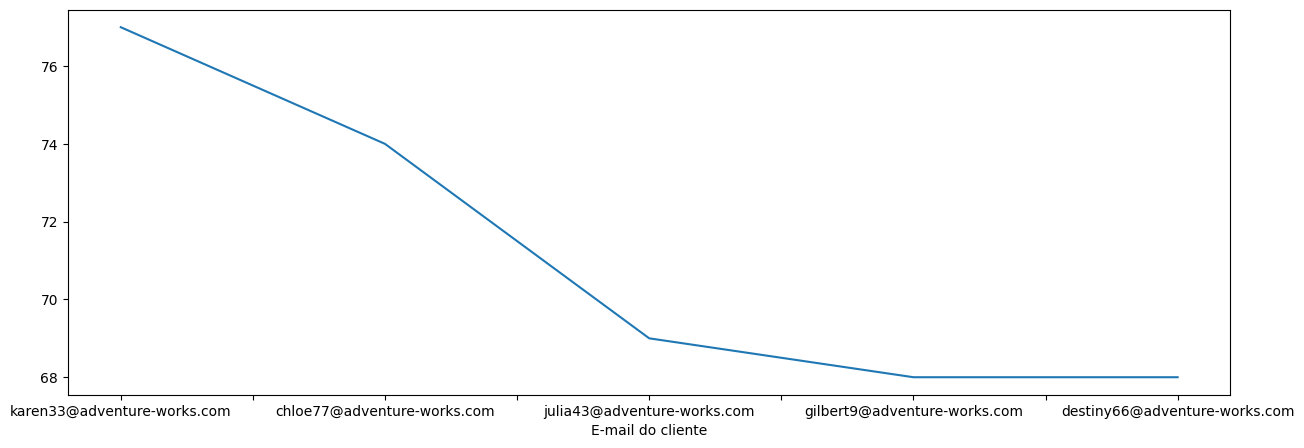

In [6]:
frequencia = vendas_df['E-mail do cliente'].value_counts()
frequencia[:5].plot(figsize=(15,5))

In [7]:
# qual loja mais vendeu
vendas_lojas = vendas_df.groupby('Quantidade Vendida').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]

### Agora podemos começar as análises